# Explore here

In [84]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt 

datosDiabetes = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

datosDiabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [85]:
datosDiabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [86]:
datosDiabetes.shape

(768, 9)

In [87]:
datosDiabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [88]:
datosDiabetes.duplicated().sum()

np.int64(0)

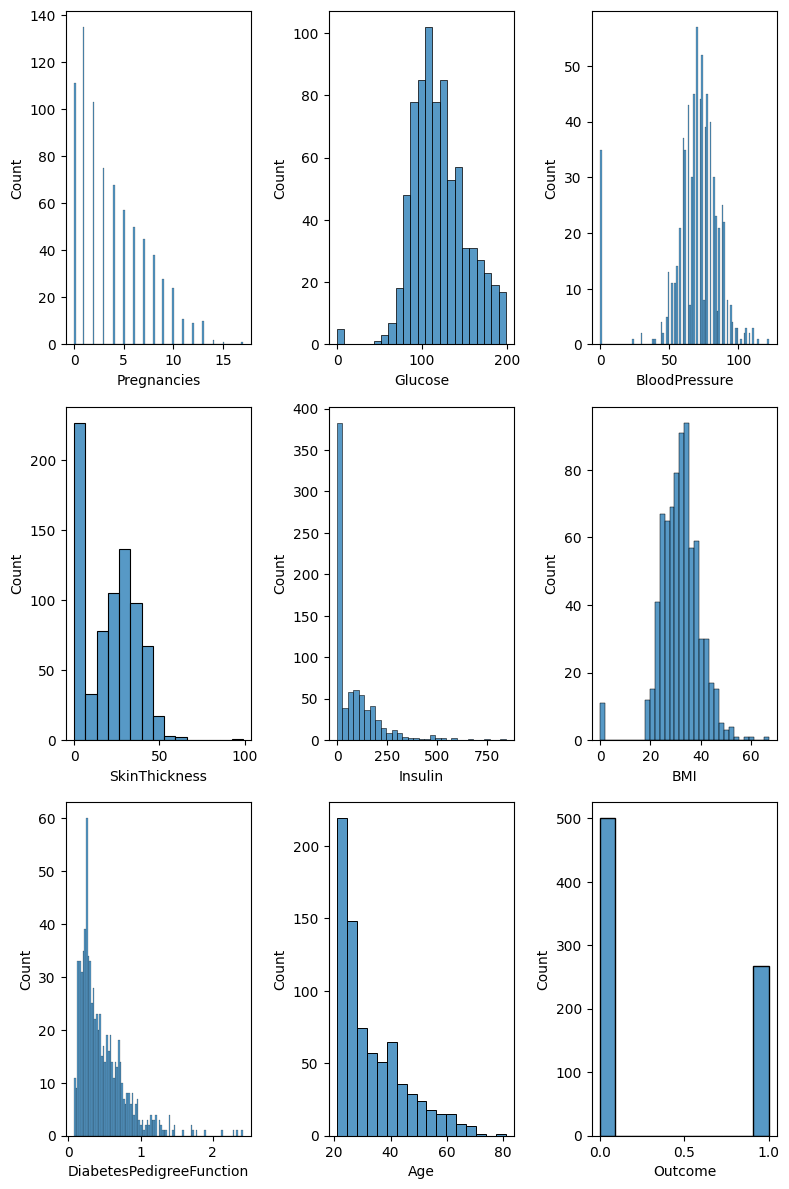

In [89]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, 3, figsize = (8, 12))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = datosDiabetes, x = "Pregnancies",bins=100)
sns.histplot(ax = axis[0, 1], data = datosDiabetes, x = "Glucose")
sns.histplot(ax = axis[0, 2], data = datosDiabetes, x = "BloodPressure",bins=100)
sns.histplot(ax = axis[1, 0], data = datosDiabetes, x = "SkinThickness")
sns.histplot(ax = axis[1, 1], data = datosDiabetes, x = "Insulin")
sns.histplot(ax = axis[1, 2], data = datosDiabetes, x = "BMI")
sns.histplot(ax = axis[2, 0], data = datosDiabetes, x = "DiabetesPedigreeFunction",bins=100)
sns.histplot(ax = axis[2, 1], data = datosDiabetes, x = "Age")
sns.histplot(ax = axis[2, 2], data = datosDiabetes, x = "Outcome")

plt.tight_layout()

# Mostrar el plot
plt.show()

In [90]:
datosDiabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


He revisado mis outliers, pero no les aplico ningun filtro a mis datos, haciendo multiples pruebas, si le aplico limites la precision al final de todo, bajaria y no seria realista esos datos.

In [91]:
Q1_Glc = datosDiabetes['Glucose'].quantile(0.25)
Q3_Glc = datosDiabetes['Glucose'].quantile(0.75)

IQR_Glc = Q3_Glc - Q1_Glc

limite_inferior_Glc = Q1_Glc - 1.5 * IQR_Glc
limite_superior_Glc = Q3_Glc + 1.5 * IQR_Glc

print(f"Limite inferior de glucosa: {limite_inferior_Glc} \nLimite superior de glucosa: {limite_superior_Glc}")

Limite inferior de glucosa: 37.125 
Limite superior de glucosa: 202.125


In [92]:
Q1_BlP = datosDiabetes['BloodPressure'].quantile(0.25)
Q3_BlP = datosDiabetes['BloodPressure'].quantile(0.75)

IQR_BlP = Q3_BlP - Q1_BlP

limite_inferior_BlP = Q1_BlP - 1.5 * IQR_BlP
limite_superior_BlP = Q3_BlP + 1.5 * IQR_BlP

print(f"Limite inferior de Presion sanguinea: {limite_inferior_BlP} \nLimite superior de Presion sanguinea: {limite_superior_BlP}")

Limite inferior de Presion sanguinea: 35.0 
Limite superior de Presion sanguinea: 107.0


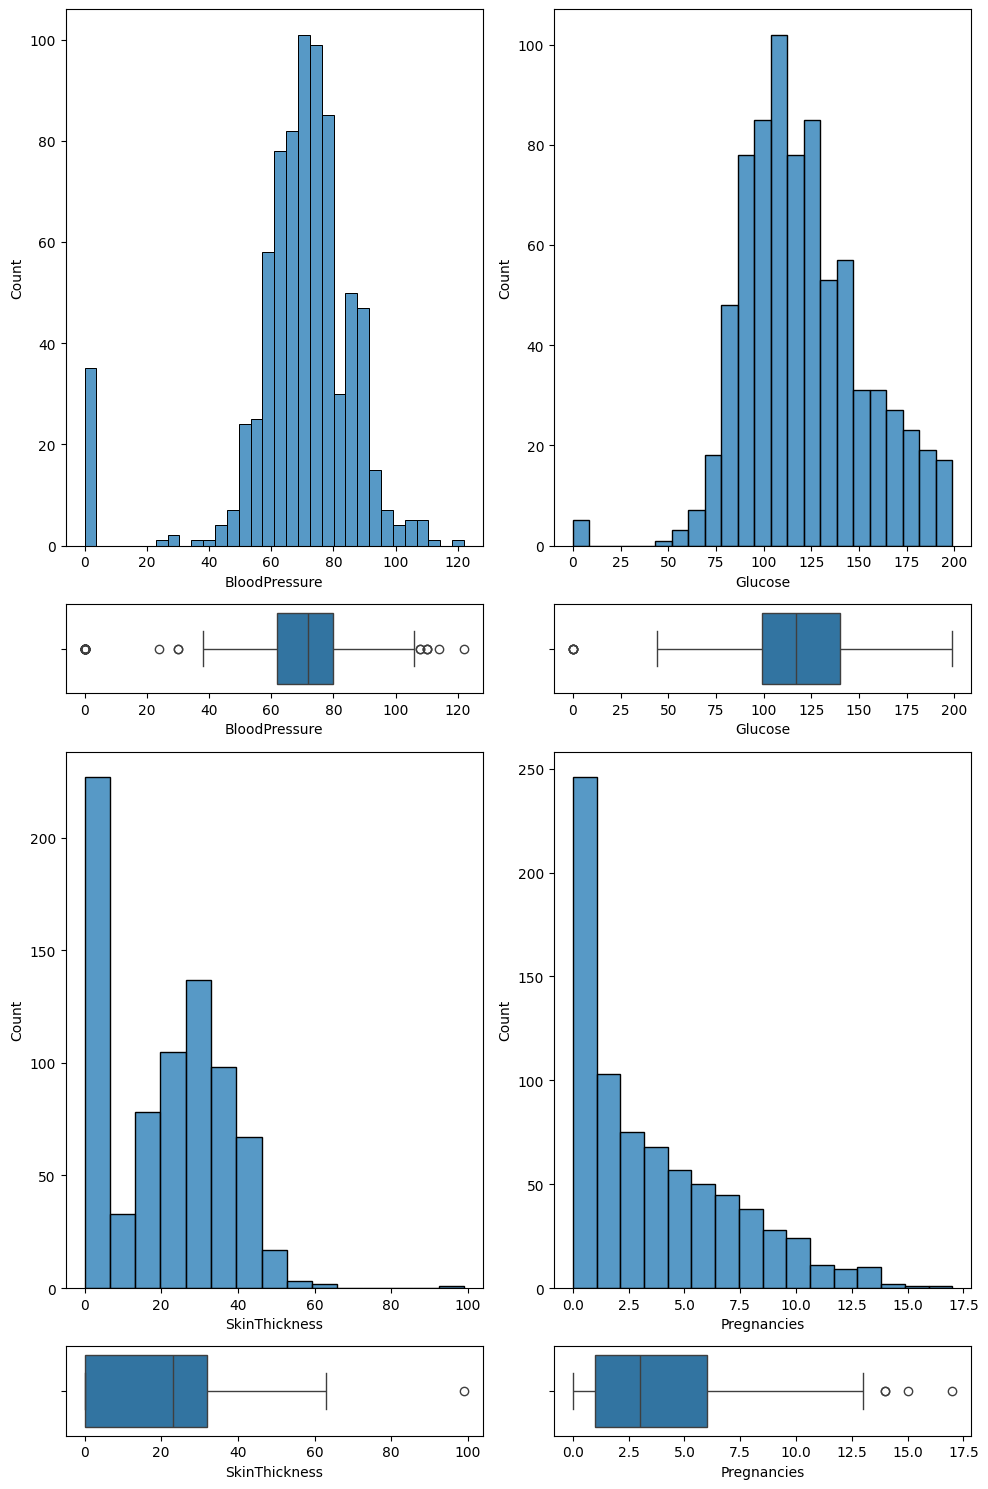

In [93]:
fig, axis = plt.subplots(4, 2, figsize = (10, 15), gridspec_kw={'height_ratios': [6, 1,6, 1]})

sns.histplot(ax = axis[0, 0], data = datosDiabetes, x = "BloodPressure")
sns.boxplot(ax = axis[1, 0], data = datosDiabetes, x = "BloodPressure")
sns.histplot(ax = axis[0, 1], data = datosDiabetes, x = "Glucose")
sns.boxplot(ax = axis[1, 1], data = datosDiabetes, x = "Glucose")
sns.histplot(ax = axis[2, 0], data = datosDiabetes, x = "SkinThickness")
sns.boxplot(ax = axis[3, 0], data = datosDiabetes, x = "SkinThickness")
sns.histplot(ax = axis[2, 1], data = datosDiabetes, x = "Pregnancies")
sns.boxplot(ax = axis[3, 1], data = datosDiabetes, x = "Pregnancies")

plt.tight_layout()

plt.show()

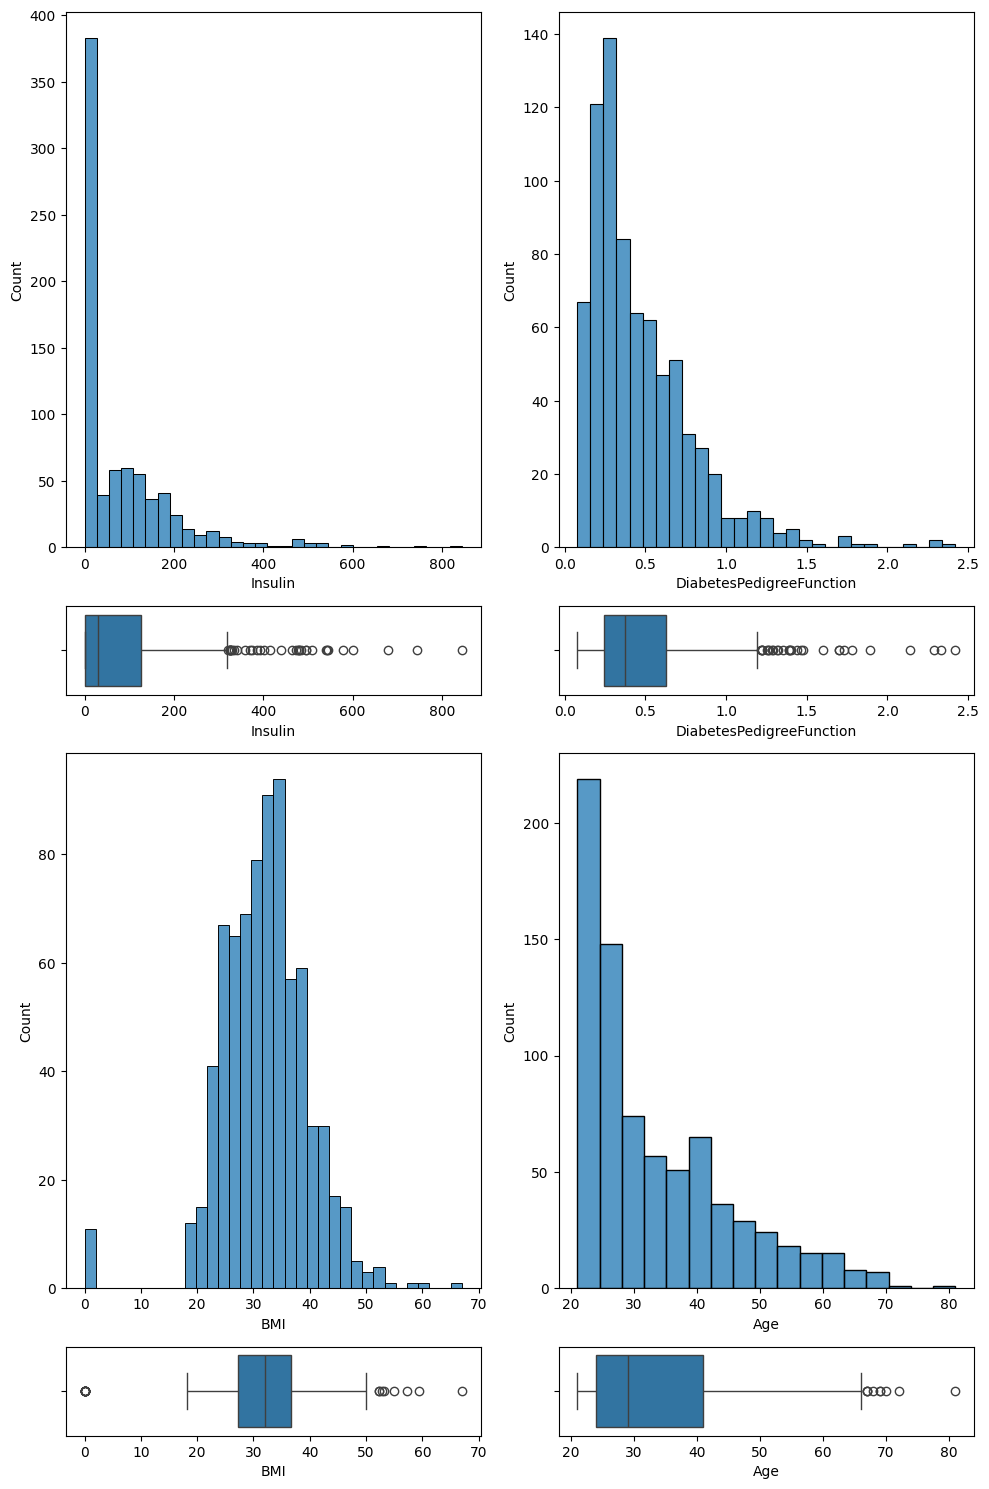

In [94]:
fig, axis = plt.subplots(4, 2, figsize = (10, 15), gridspec_kw={'height_ratios': [6, 1,6, 1]})

sns.histplot(ax = axis[0, 0], data = datosDiabetes, x = "Insulin")
sns.boxplot(ax = axis[1, 0], data = datosDiabetes, x = "Insulin")
sns.histplot(ax = axis[0, 1], data = datosDiabetes, x = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[1, 1], data = datosDiabetes, x = "DiabetesPedigreeFunction")
sns.histplot(ax = axis[2, 0], data = datosDiabetes, x = "BMI")
sns.boxplot(ax = axis[3, 0], data = datosDiabetes, x = "BMI")
sns.histplot(ax = axis[2, 1], data = datosDiabetes, x = "Age")
sns.boxplot(ax = axis[3, 1], data = datosDiabetes, x = "Age")

plt.tight_layout()

plt.show()

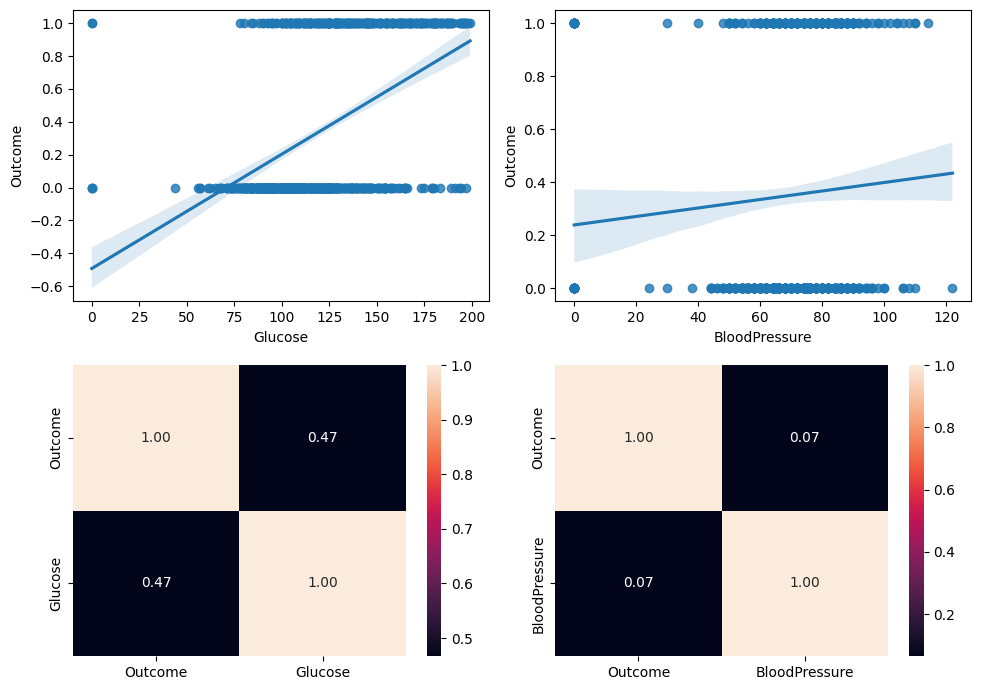

In [95]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = datosDiabetes, x = "Glucose", y = "Outcome")
sns.heatmap(datosDiabetes[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = True)

sns.regplot(ax = axis[0,1], data = datosDiabetes, x = "BloodPressure", y = "Outcome")
sns.heatmap(datosDiabetes[["Outcome", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = True)

plt.tight_layout()

plt.show()

In [96]:
datosDiabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Separo mis datos para empezar a normalizaros.

In [97]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

cols_a_normalizar = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

X = datosDiabetes.drop("Outcome", axis = 1)[cols_a_normalizar]
y = datosDiabetes["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train[cols_a_normalizar] = scaler.fit_transform(X_train[cols_a_normalizar])
X_test[cols_a_normalizar] = scaler.transform(X_test[cols_a_normalizar])

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,0.117647,0.422111,0.000000,0.000000,0.000000,0.000000,0.096499,0.000000
618,0.529412,0.562814,0.672131,0.380952,0.000000,0.420268,0.514091,0.483333
346,0.058824,0.698492,0.377049,0.301587,0.098109,0.427720,0.245944,0.016667
294,0.000000,0.809045,0.409836,0.000000,0.000000,0.326379,0.075149,0.733333
231,0.352941,0.673367,0.655738,0.587302,0.437352,0.688525,0.068318,0.416667


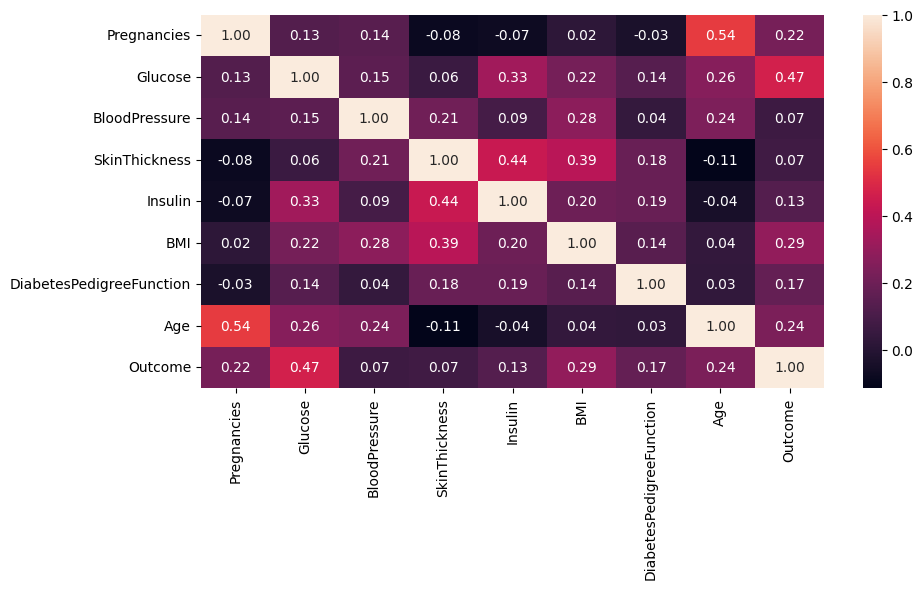

In [98]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(datosDiabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]
       .corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Elijo mis mejores valores.

In [99]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 7)
selection_model.fit(X_train, y_train)

columnasSeleccion =  X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = columnasSeleccion)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = columnasSeleccion)

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.117647,0.422111,0.000000,0.000000,0.000000,0.096499,0.000000
1,0.529412,0.562814,0.672131,0.000000,0.420268,0.514091,0.483333
2,0.058824,0.698492,0.377049,0.098109,0.427720,0.245944,0.016667
3,0.000000,0.809045,0.409836,0.000000,0.326379,0.075149,0.733333
4,0.352941,0.673367,0.655738,0.437352,0.688525,0.068318,0.416667


In [100]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/datos_train.csv", index = False)
X_test_sel.to_csv("../data/processed/datos_test.csv", index = False)

In [101]:
train_datos = pd.read_csv("../data/processed/datos_train.csv")
test_datos = pd.read_csv("../data/processed/datos_test.csv")

train_datos.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.117647,0.422111,0.000000,0.000000,0.000000,0.096499,0.000000,0
1,0.529412,0.562814,0.672131,0.000000,0.420268,0.514091,0.483333,1
2,0.058824,0.698492,0.377049,0.098109,0.427720,0.245944,0.016667,0
3,0.000000,0.809045,0.409836,0.000000,0.326379,0.075149,0.733333,0
4,0.352941,0.673367,0.655738,0.437352,0.688525,0.068318,0.416667,1


Represento mi grafico 

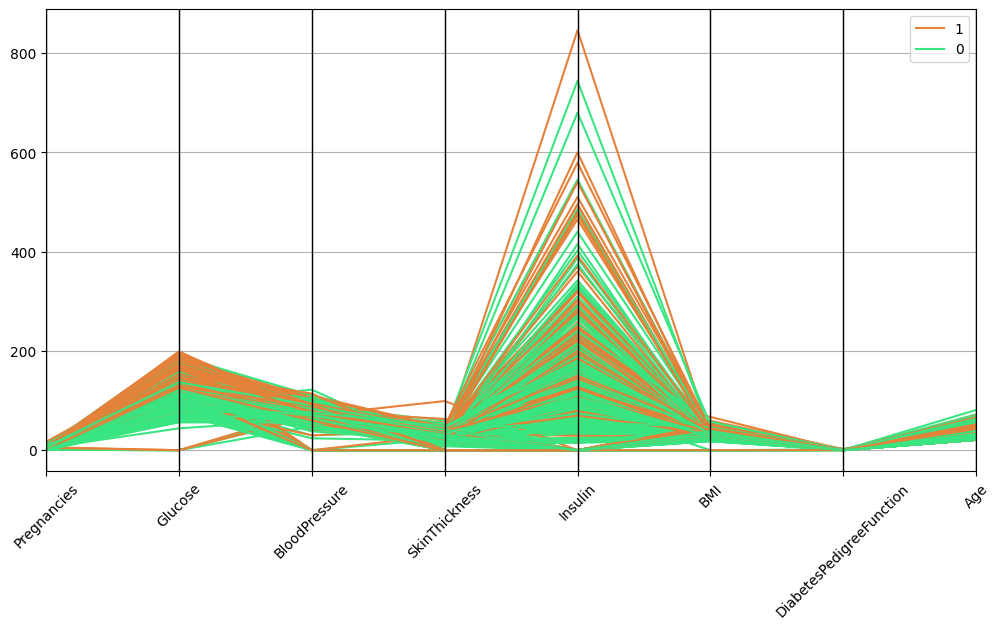

In [136]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(datosDiabetes, "Outcome", color = ("#E58139", "#39E581", "#8139E5")).tick_params(axis='x', rotation=45)

plt.show()


In [103]:
X_train = train_datos.drop(['Outcome'],axis=1)
y_train = train_datos['Outcome']
X_test =test_datos.drop(['Outcome'],axis=1)
y_test = test_datos['Outcome']

In [105]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.117647,0.422111,0.000000,0.000000,0.000000,0.096499,0.000000
1,0.529412,0.562814,0.672131,0.000000,0.420268,0.514091,0.483333
2,0.058824,0.698492,0.377049,0.098109,0.427720,0.245944,0.016667
3,0.000000,0.809045,0.409836,0.000000,0.326379,0.075149,0.733333
4,0.352941,0.673367,0.655738,0.437352,0.688525,0.068318,0.416667


Usando la propiedad que busca los mejores parametros para mi arbol de decision han sido: 
    max_depth=5,    min_samples_leaf=4,    min_samples_split=2

Y mejoró mi rendimiento de datos

In [129]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    random_state = 42,
    max_depth=5,    
    min_samples_leaf=4,
    min_samples_split=2
)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

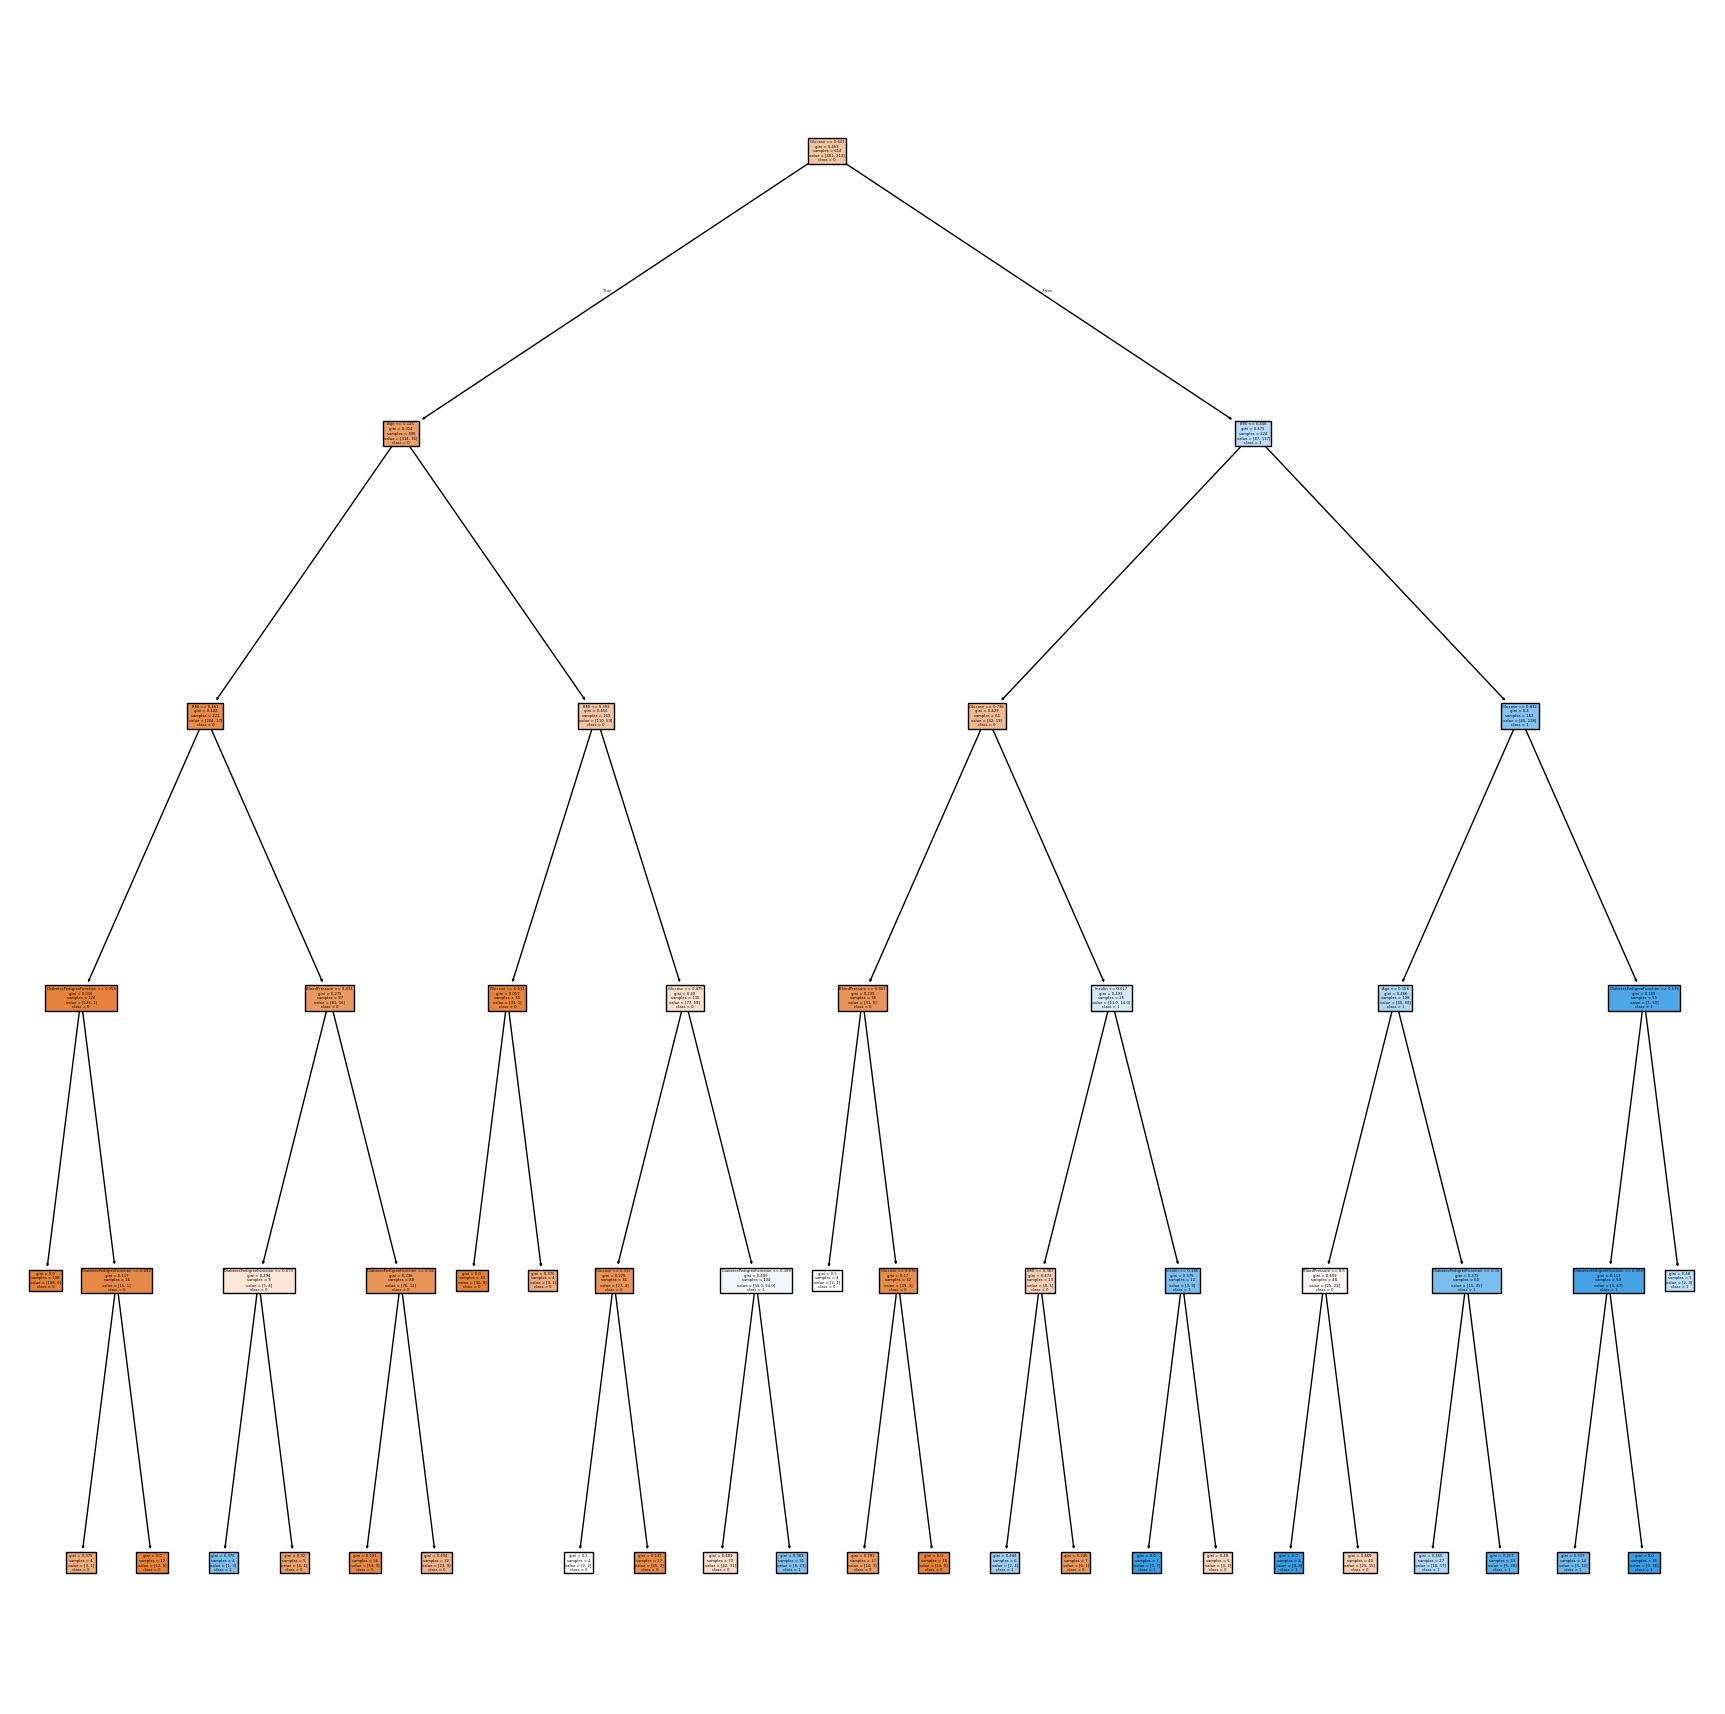

In [130]:
from sklearn import tree

fig = plt.figure(figsize=(22,22))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

Guardo mi modelo de Arbol de decision, con una profundidad maxima de 5, numero minimo de muestras por hoja de 4 y numero mino de muestras para dividir un nodo en 2

In [132]:
from pickle import dump
dump(model, open("Arbol_decision42_542.sav", "wb"))

In [118]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=5, min_samples_leaf=4,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [131]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [121]:
y_pred_test = model.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [122]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [123]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print("MSE Test: ", mse_test)
print("RMSE Test: ", rmse_test)

MSE Test:  0.2077922077922078
RMSE Test:  0.4558423058385518


Haciendo multiples pruebas, me podido ver como mis datos de prueba y datos de test, se han aproximado entre ellos, los de test han bajado de 1 a 0.83 y los train han subido de 0.74 a 0.79.

In [124]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7922077922077922
F1 score Test:  0.7922077922077922
Precision Test:  0.7922077922077922
Recall Test:  0.7922077922077922
Accuracy Train:  0.8306188925081434
F1 score Train:  0.8306188925081434
Precision Train:  0.8306188925081434
Recall Train:  0.8306188925081434


In [133]:
from pickle import dump

dump(model, open("../models/Arbol_decision42_542.sav", "wb"))